# Look ESC-50 data

[ESC-50](https://github.com/karoldvl/ESC-50)

## Settings

In [1]:
from pathlib import Path

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

import librosa
import librosa.display

import IPython.display as ipd

In [2]:
data_dir = Path().cwd().parent/'data'
raw_data_dir = data_dir/'external'/'ESC-50'
processed_data_dir = data_dir/'processed'/'ESC-50'

In [3]:
metadata_path = raw_data_dir/'meta'/'esc50.csv'
audio_dir = raw_data_dir/'audio'
spectrogram_dir = processed_data_dir/'spectrogram'

## Load Metadata

In [4]:
metadata = pd.read_csv(str(metadata_path))

In [5]:
metadata

,filename,fold,target,category,esc10,src_file,take
0,1-100032-A-0.wav,1,0,dog,True,100032,A
1,1-100038-A-14.wav,1,14,chirping_birds,False,100038,A
2,1-100210-A-36.wav,1,36,vacuum_cleaner,False,100210,A
3,1-100210-B-36.wav,1,36,vacuum_cleaner,False,100210,B
4,1-101296-A-19.wav,1,19,thunderstorm,False,101296,A
5,1-101296-B-19.wav,1,19,thunderstorm,False,101296,B
6,1-101336-A-30.wav,1,30,door_wood_knock,False,101336,A
7,1-101404-A-34.wav,1,34,can_opening,False,101404,A
8,1-103298-A-9.wav,1,9,crow,False,103298,A
9,1-103995-A-30.wav,1,30,door_wood_knock,False,103995,A


In [6]:
n_data = len(metadata)
print('#Data: {}'.format(n_data))

#Data: 2000


In [7]:
label_data = metadata.loc[:, ['target', 'category']].drop_duplicates()
label_data = label_data.sort_values(by=['target'], ascending=True)
label_data = label_data.reset_index(drop=True)
#label_data

In [8]:
label_data['number'] = 0
for i, target in enumerate(label_data['target']):
    label_data.loc[i, 'number'] = len(metadata.query('target == @target'))
label_data

,target,category,number
0,0,dog,40
1,1,rooster,40
2,2,pig,40
3,3,cow,40
4,4,frog,40
5,5,cat,40
6,6,hen,40
7,7,insects,40
8,8,sheep,40
9,9,crow,40


## Load

In [9]:
idx = 5

In [10]:
data = metadata.iloc[idx, :]

In [11]:
data

filename    1-101296-B-19.wav
fold                        1
target                     19
category         thunderstorm
esc10                   False
src_file               101296
take                        B
Name: 5, dtype: object

In [12]:
fpath = audio_dir/data['filename']

In [13]:
x, fs = librosa.load(str(fpath))

In [14]:
x.shape

(110250,)

In [15]:
fs

22050

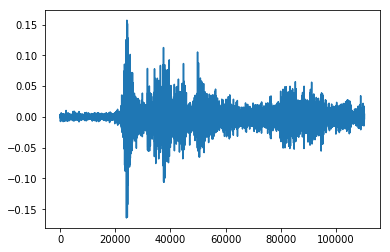

In [16]:
plt.plot(x)
plt.show()

In [17]:
ipd.Audio(x, rate=fs)

## Spectrogram

In [18]:
def calculate_sp(x, n_fft=512, hop_length=256):
    # change wave data to stft
    stft = librosa.stft(x, n_fft=n_fft, hop_length=hop_length)
    sp = librosa.amplitude_to_db(np.abs(stft))
    return sp

In [19]:
def show_sp(sp, fs, hop_length):
    # display wave in spectrogram
    librosa.display.specshow(sp, sr=fs, x_axis="time", y_axis="log", hop_length=hop_length)
    plt.colorbar(format='%+2.0f dB')
    plt.title('Spectrogram')
    plt.show()

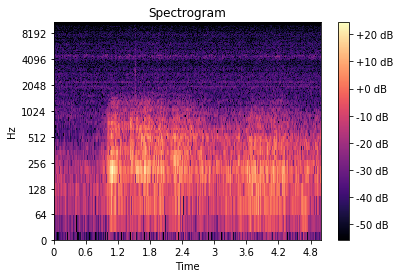

In [20]:
sp = calculate_sp(x)
show_sp(sp, fs, hop_length=256)

In [21]:
sp.shape

(257, 431)

## Mel Spectrogram

In [22]:
def calculate_melsp(x, n_fft=1024, hop_length=128):
    stft = np.abs(librosa.stft(x, n_fft=n_fft, hop_length=hop_length))**2
    log_stft = librosa.power_to_db(stft)
    melsp = librosa.feature.melspectrogram(S=log_stft,n_mels=128)
    return melsp

In [23]:
def show_melsp(melsp, fs):
    # display wave in heatmap
    librosa.display.specshow(melsp, sr=fs, x_axis="time", y_axis="mel", hop_length=128)
    plt.colorbar(format='%+2.0f dB')
    plt.title('Mel spectrogram')
    plt.show()

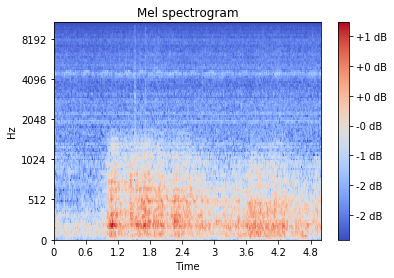

In [24]:
melsp = calculate_melsp(x)
show_melsp(melsp, fs)

In [25]:
melsp.shape

(128, 862)

## Data Augmantation

In [26]:
def add_white_noise(x, rate=0.002):
    return x + rate*np.random.randn(len(x))

In [27]:
def shift_sound(x, rate=2):
    return np.roll(x, int(len(x)//rate))

In [28]:
def stretch_sound(x, rate=1.1):
    input_length = len(x)
    x = librosa.effects.time_stretch(x, rate)
    if len(x)>input_length:
        return x[:input_length]
    else:
        return np.pad(x, (0, max(0, input_length - len(x))), "constant")

## train/valid/test split

In [29]:
train_metadata_path = processed_data_dir/'metadata_train.csv'
valid_metadata_path = processed_data_dir/'metadata_valid.csv'
test_metadata_path = processed_data_dir/'metadata_test.csv'

In [30]:
metadata

,filename,fold,target,category,esc10,src_file,take
0,1-100032-A-0.wav,1,0,dog,True,100032,A
1,1-100038-A-14.wav,1,14,chirping_birds,False,100038,A
2,1-100210-A-36.wav,1,36,vacuum_cleaner,False,100210,A
3,1-100210-B-36.wav,1,36,vacuum_cleaner,False,100210,B
4,1-101296-A-19.wav,1,19,thunderstorm,False,101296,A
5,1-101296-B-19.wav,1,19,thunderstorm,False,101296,B
6,1-101336-A-30.wav,1,30,door_wood_knock,False,101336,A
7,1-101404-A-34.wav,1,34,can_opening,False,101404,A
8,1-103298-A-9.wav,1,9,crow,False,103298,A
9,1-103995-A-30.wav,1,30,door_wood_knock,False,103995,A


In [31]:
label_data

,target,category,number
0,0,dog,40
1,1,rooster,40
2,2,pig,40
3,3,cow,40
4,4,frog,40
5,5,cat,40
6,6,hen,40
7,7,insects,40
8,8,sheep,40
9,9,crow,40


In [32]:
labels = label_data['target'].values
n_label = len(labels)
label_indices_shuffled = np.random.permutation(range(n_label))

### Test data

only unknown label data

In [33]:
n_test_label = 5

In [34]:
test_label_indices = label_indices_shuffled[:n_test_label]
test_labels = labels[test_label_indices]
test_labels

array([ 2, 34, 24, 40, 28])

In [35]:
test_indices = []
for label in test_labels:
    test_indices.extend(metadata.query('target == @label').index.values.tolist())
test_metadata = metadata.loc[test_indices, :]
test_metadata.to_csv(str(test_metadata_path), index=False, encoding='utf-8')
test_metadata

,filename,fold,target,category,esc10,src_file,take
99,1-208757-A-2.wav,1,2,pig,False,208757,A
100,1-208757-B-2.wav,1,2,pig,False,208757,B
101,1-208757-C-2.wav,1,2,pig,False,208757,C
102,1-208757-D-2.wav,1,2,pig,False,208757,D
103,1-208757-E-2.wav,1,2,pig,False,208757,E
133,1-260640-A-2.wav,1,2,pig,False,260640,A
134,1-260640-B-2.wav,1,2,pig,False,260640,B
135,1-260640-C-2.wav,1,2,pig,False,260640,C
584,2-158746-A-2.wav,2,2,pig,False,158746,A
585,2-158746-B-2.wav,2,2,pig,False,158746,B


### Valid data

unknown label data + known label data

In [36]:
n_only_valid_label = 2
n_known_label_data = 120

In [37]:
valid_label_indices = label_indices_shuffled[n_test_label:n_test_label+n_only_valid_label]
valid_labels = labels[valid_label_indices]
valid_labels

array([41,  6])

In [38]:
valid_only_indices = []
for label in valid_labels:
    valid_only_indices.extend(metadata.query('target == @label').index.values.tolist())

In [39]:
indices_all = metadata.index.values.tolist()
indices_left = list(set(indices_all) - set(valid_only_indices) - set(test_indices))

In [40]:
_indices = np.random.permutation(range(len(indices_left)))[:n_known_label_data]
valid_known_indices = np.array(indices_left)[_indices].tolist()

In [41]:
valid_indices = valid_only_indices + valid_known_indices

In [42]:
valid_metadata = metadata.loc[valid_indices, :]
valid_metadata.to_csv(str(valid_metadata_path), index=False, encoding='utf-8')
valid_metadata

,filename,fold,target,category,esc10,src_file,take
24,1-116765-A-41.wav,1,41,chainsaw,True,116765,A
92,1-19898-A-41.wav,1,41,chainsaw,True,19898,A
93,1-19898-B-41.wav,1,41,chainsaw,True,19898,B
94,1-19898-C-41.wav,1,41,chainsaw,True,19898,C
223,1-47250-A-41.wav,1,41,chainsaw,True,47250,A
224,1-47250-B-41.wav,1,41,chainsaw,True,47250,B
314,1-64398-A-41.wav,1,41,chainsaw,True,64398,A
315,1-64398-B-41.wav,1,41,chainsaw,True,64398,B
645,2-50667-A-41.wav,2,41,chainsaw,True,50667,A
646,2-50667-B-41.wav,2,41,chainsaw,True,50667,B


### Train data

In [43]:
train_metadata = metadata.drop(test_indices, axis=0).drop(valid_indices, axis=0)
train_metadata.to_csv(str(train_metadata_path), index=False, encoding='utf-8')
train_metadata

,filename,fold,target,category,esc10,src_file,take
0,1-100032-A-0.wav,1,0,dog,True,100032,A
1,1-100038-A-14.wav,1,14,chirping_birds,False,100038,A
3,1-100210-B-36.wav,1,36,vacuum_cleaner,False,100210,B
4,1-101296-A-19.wav,1,19,thunderstorm,False,101296,A
5,1-101296-B-19.wav,1,19,thunderstorm,False,101296,B
6,1-101336-A-30.wav,1,30,door_wood_knock,False,101336,A
8,1-103298-A-9.wav,1,9,crow,False,103298,A
9,1-103995-A-30.wav,1,30,door_wood_knock,False,103995,A
10,1-103999-A-30.wav,1,30,door_wood_knock,False,103999,A
11,1-104089-A-22.wav,1,22,clapping,False,104089,A
